# ML 2-class Classification  (DR3)

<h5 style="text-align:right; margin-right:15px"> 2023-12-20 07:02</h5>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7efbb9e6b460>

MLfit applied to 4FGL-DR3 

SKlearn: SKlearn specifications: 
* features: ('log_var', 'log_fpeak', 'log_epeak', 'd')
* targets: {'pulsar': ('psr', 'msp'), 'blazar': ('bll', 'fsrq')}
* model: SVC(C=1, gamma=2)
        

## Feature distributions 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7efbb96bf310>
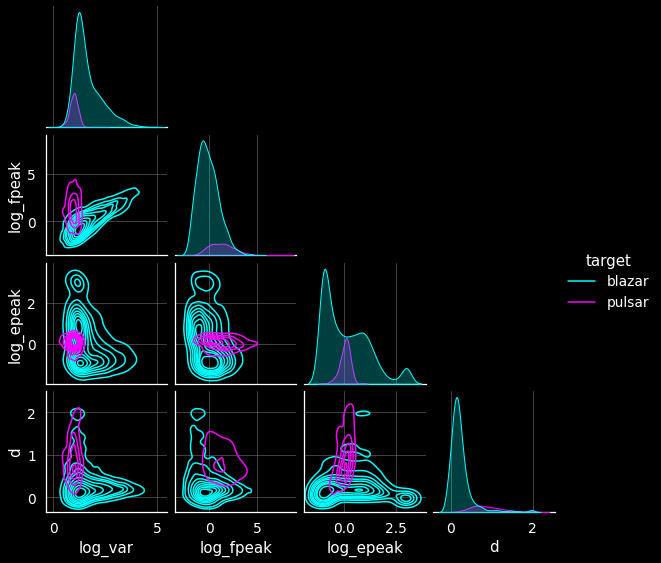

## Train then apply prediction 

### The confusion matrix

prediction,blazar,pulsar
associations,,
blazar,2123,4
pulsar,16,274


purity=0.99, efficiency=0.94

### All predictions

prediction,blazar,pulsar
association,,
bll,1354,2
fsrq,769,2
psr,4,139
msp,12,135
glc,11,23
bcu,1473,81
spp,37,64
other,103,29
unid,1339,840


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7efbb7474a90>
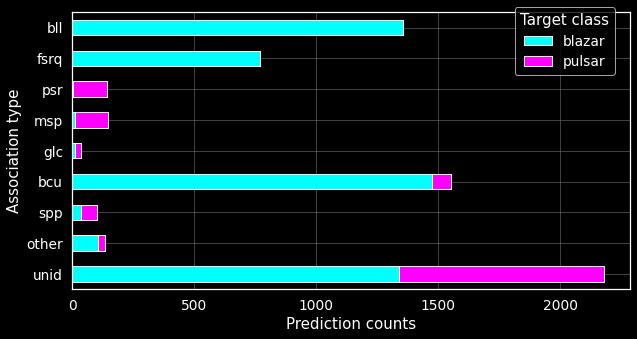

#### Write summary file

File `files/dr3_2_class_classification.csv` exists--not overwriting.


In [1]:
%run pylib/ml_fit dr3 dark show
self=doc(2,2)


## Compare $E_p$ vs $d$ for training and unid prediction

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7efbb59ac9d0>
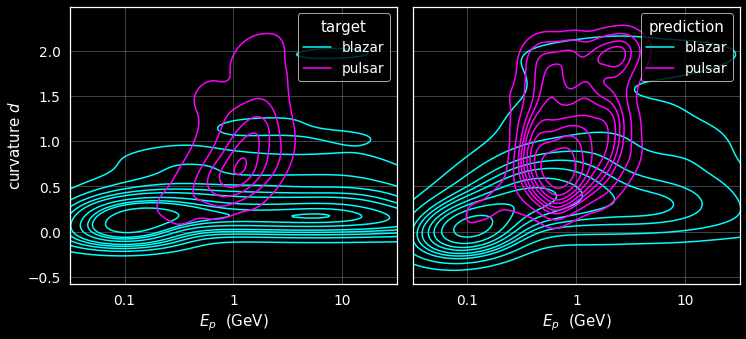

In [4]:
def ep_vs_d(self):
    # from pylib.tools import epeak_kw
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5),sharex=True,sharey=True,
                                 gridspec_kw=dict(wspace=0.05))
    kw = dict( x='log_epeak', y='d',  palette=self.palette[:2],hue_order=self.target_names)
    
    sns.kdeplot(self.df,ax=ax1, hue=self.target_field, **kw)
    sns.kdeplot(self.df.query('association=="unid"'),ax=ax2, hue='prediction',**kw)

    ax1.set(**epeak_kw(),ylabel='curvature $d$', xlim=(-1.5,1.5)); ax2.set(**epeak_kw())
    return fig
show(f"""## Compare $E_p$ vs $d$ for training and unid prediction""")
show_fig(ep_vs_d, self)

In [8]:
probs= self.predict_prob(query=None)
df = pd.concat([self.df, probs], axis=1)
unid = df.query('association=="unid"')
# show(f"""Total unids: {len(unid)}""")
# show(f"""predicted pulsar type: {len(unid.query('prediction=="pulsar" '))}""")
# show(f"""Within (0.1,0.95): {len(unid.query('0.95>p_pulsar>0.1'))}""")
# show(f"""LIkely blazars: {len(unid.query('p_pulsar<0.1'))}""")
d = {'Total unids': len(unid),
    'predicted pulsar type': len(unid.query('prediction=="pulsar" ')),
    'Within (0.1,0.95)':  len(unid.query('0.95>p_pulsar>0.1')),
    'Likely blazar'  :   len(unid.query('p_pulsar<0.1')),
    }
pd.Series(d)

Total unids              2179
predicted pulsar type     840
Within (0.1,0.95)         396
LIkely blazars           1161
dtype: int64

In [ ]:
ax=sns.kdeplot(unid.query('0.95>p_pulsar>0.1'), color='cyan', x='log_epeak', y='d');
ax.set(**epeak_kw());